# Startup_funding analysis

### 1. Data Cleaning


In this exercise, I work with a datasets containing information on indian startups' funding, including the startup's details, the funding it received, and the investors' information. 

In the `data` folder, you will find the following three datasets, including data from 2019, 2020 and 2021: 

- `startup_funding2019.csv`
- `startup_funding2020.csv`
- `startup_funding2021.csv`

At [this link](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data?select=startup_funding2019.csv) you can find the source of the original data (Kaggle) as well as more information on its composition

In [3]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import os
import seaborn as sns
import requests
from bs4 import BeautifulSoup

First of all, we use a **for loop** to load all three .csv files in a temporary DataFrame called `df_tmp` and, at each cycle, we add a new column named `Year` that includes the year of that csv file to the temporary table and append it to a final DataFrame named `fnd`. 

In [6]:
#Starting an empty Data Frame
fnd = pd.DataFrame([])
#Save all the files in a list
files = os.listdir("Data/")
#For Loop and Concat9
for file in files:
    if file.startswith('startup'):
       df_tmp = pd.read_csv("Data/"+file)
       year = file[-8:-4]
       df_tmp["year"] = year
       fnd = pd.concat([fnd, df_tmp])
# index again to avoid duplicates
fnd.index = pd.RangeIndex(len(fnd.index))
# check the shape of the file
fnd.shape


(2343, 10)

Let's familiarize with the dataframe.

In [7]:
fnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2343 non-null   object
 1   Founded        2102 non-null   object
 2   HeadQuarter    2228 non-null   object
 3   Sector         2325 non-null   object
 4   What it does   2343 non-null   object
 5   Founders       2324 non-null   object
 6   Investor       2243 non-null   object
 7   Amount($)      2211 non-null   object
 8   Stage          1220 non-null   object
 9   year           2343 non-null   object
dtypes: object(10)
memory usage: 183.2+ KB


As we can see, some columns have wrong data type, *year* and *Amount($)* are seen as Object

In [8]:
#Checking the value that needs edit in "Amount($)"
fnd["Amount($)"].unique()


array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000', '$200,000', '$340,000', '$45,000,000', '$1,200,000',
       '$660,000,000', '$120,000', '$7,500,000', '$500,000', '$3,000,000',
       '$10,000,000', '$145,000,000', '$21,000,000', '$560,000'

In [9]:
#We need to delete: "," and "$"
fnd["Amount($)"] = fnd["Amount($)"].str.replace(',', '')
fnd["Amount($)"] = fnd["Amount($)"].str.replace('$', '', regex=False)
#We also utilize "To_Numeric" to transform every entry as numeric , using "errors='coerce'" al the non-numeric value (as "Undisclosed") are changed in "NaN"
fnd["Amount($)"] = pd.to_numeric(fnd["Amount($)"], errors='coerce')

In [10]:
#check value for "Founded"
fnd["Founded"].unique()

array([nan, 2014.0, 2004.0, 2013.0, 2010.0, 2018.0, 2019.0, 2017.0,
       2011.0, 2015.0, 2016.0, 2012.0, 2008.0, '2019', '2018', '2020',
       '2016', '2008', '2015', '2017', '2014', '1998', '2007', '2011',
       '1982', '2013', '2009', '2012', '1995', '2010', '2006', '1978',
       '1999', '1994', '2005', '1973', '-', '2002', '2004', '2001', 2021,
       2020, 1993, 1999, 1989, 2009, 2002, 1994, 2006, 2000, 2007, 1978,
       2003, 1998, 1991, 1984, 2005, 1963], dtype=object)

In [11]:
#We use the same method of before to change all the "-" in "NaN"
fnd["Founded"] = pd.to_numeric(fnd["Founded"], errors='coerce')

In [12]:
#We already know the value of year, but let's check to see if there is any error
fnd["year"].unique()

array(['2019', '2020', '2021'], dtype=object)

In [13]:
#we can simply change the type
fnd["year"] = fnd["year"].astype(int)

In [14]:

fnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2343 non-null   object 
 1   Founded        2101 non-null   float64
 2   HeadQuarter    2228 non-null   object 
 3   Sector         2325 non-null   object 
 4   What it does   2343 non-null   object 
 5   Founders       2324 non-null   object 
 6   Investor       2243 non-null   object 
 7   Amount($)      1842 non-null   float64
 8   Stage          1220 non-null   object 
 9   year           2343 non-null   int32  
dtypes: float64(2), int32(1), object(7)
memory usage: 174.0+ KB


### 2. Data Analysis

Now that the dataframe is clean, let's start to explore the data, first of all we can check who is the *investor* that funded the highest numer of *Company/Brand*'s overall

    

In [734]:
# run this cell (don not delete it)
fnd.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(1)

,Investor,size
696,Inflection Point Ventures,36


I want also to check how "Inflection Point Ventures" **rank** (in terms of most *Company/Brand*'s funded) **in 2020**

In [15]:
#creating a filtered df
fnd_2020 = fnd[fnd['year'] == 2020]
#groupby investor and sorting
fnd_2020 = fnd_2020.groupby("Investor", as_index=False).size().sort_values('size', ascending=False).reset_index(drop=True)

In [16]:
#Creating a rank column 
fnd_2020["rank"] = fnd_2020.index+1
fnd_2020.head()

,Investor,size,rank
0,Venture Catalysts,20,1
1,Mumbai Angels Network,12,2
2,Angel investors,12,3
3,Inflection Point Ventures,11,4
4,Undisclosed,10,5


In [17]:
#localize our investor
fnd_2020[fnd_2020["Investor"]=="Inflection Point Ventures"]

,Investor,size,rank
3,Inflection Point Ventures,11,4


### 3. Merging the data

We have some information, but i want to have more, expecially I'm interested in Salaries, yes, i like money! The dataset name is `Software Professionals Salary.csv` and you will find it in the `data` folder of this repository. At [this link](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?search=salary) you can find the source of the data (Kaggle) as well as more information on its composition. 

In [18]:
#Load the `Software Professionals Salary.csv` file in a DataFrame
sps = pd.read_csv("data/Software Professionals Salary.csv", sep=",")

In [19]:
#starting from the `sps` DataFrame, i create a new DF called `sps_loc` where i can group by `Location` and show, for each city in the dataset, the average `Rating` and `Salary`;
sps_loc = sps.groupby("Location")[["Rating","Salary"]].mean()
sps_loc = sps_loc.reset_index()
sps_loc.head()

,Location,Rating,Salary
0,Bangalore,3.920232,735344.739593
1,Chennai,3.902726,584559.661513
2,Hyderabad,3.914484,679099.157376
3,Jaipur,3.940741,629135.802469
4,Kerala,3.885185,553577.481481


In [21]:
#starting from the `fnd` DataFrame, we can also create a new DF called `fnd_loc` where we group by `HeadQuarter` and show, for each city in the dataset, for the year 2021, the total number of `Company/Brand`s funded and the total `Amount($)` invested;
fnd_2021 = fnd[fnd['year'] == 2021]
fnd_loc = fnd_2021.groupby('HeadQuarter').agg({
    'Company/Brand': 'count',
    'Amount($)': 'sum'
}).reset_index()
fnd_loc.head()

,HeadQuarter,Company/Brand,Amount($)
0,Ahmadabad,6,4.300000e+06
1,Ahmedabad,11,1.981550e+08
2,Ambernath,1,0.000000e+00
3,Andheri,1,0.000000e+00
4,Bangalore,425,1.432742e+10


In [741]:
# Now we merge the two DataFrames so to **keep just the cities that are in both datasets** and save the results in a third DataFrame called `sps_fnd_loc`
sps_fnd_loc = pd.merge(sps_loc, fnd_loc, left_on="Location", right_on="HeadQuarter", how="inner")
sps_fnd_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8 non-null      object 
 1   Rating         8 non-null      float64
 2   Salary         8 non-null      float64
 3   HeadQuarter    8 non-null      object 
 4   Company/Brand  8 non-null      int64  
 5   Amount($)      8 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 448.0+ bytes


In [742]:
    #using the `sps_fnd_loc` DataFrame: 
       # 1. delete the `HeadQuarter` column
del sps_fnd_loc['HeadQuarter']
       # 2. create a new column `Amount($MM)` that is equal to `Amount($)` divided by 1,000,000
sps_fnd_loc['Amount($MM)'] = sps_fnd_loc['Amount($)'] / 1000000       
       # 3. delete the `Amount($)` column
del sps_fnd_loc["Amount($)"]
       # 4. rename all the columns to the following names: `['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']`
sps_fnd_loc = sps_fnd_loc.rename(columns={
    'Location': 'City',
    'Rating': 'Avg. Rating',
    'Salary': 'Avg. Salary',
    'Company/Brand': 'Nr. Companies Funded',
    'Amount($MM)': 'Sum Funding ($MM)'
})
sps_fnd_loc.head()

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
0,Bangalore,3.920232,735344.739593,425,14327.42
1,Chennai,3.902726,584559.661513,40,717.14
2,Hyderabad,3.914484,679099.157376,34,243.96
3,Jaipur,3.940741,629135.802469,11,343.30
4,Kolkata,4.024719,710925.573034,5,28.00


In [743]:
 #  let's see the "City" that received the "highest" "Avg. Rating" score by employees, this way we can see avg. Salary, Companies funded and funding received
sps_fnd_loc.sort_values("Avg. Rating", ascending=False)


,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
4,Kolkata,4.024719,710925.573034,5,28.00
6,New Delhi,3.943415,658756.735632,143,1673.01
3,Jaipur,3.940741,629135.802469,11,343.30
0,Bangalore,3.920232,735344.739593,425,14327.42
2,Hyderabad,3.914484,679099.157376,34,243.96
1,Chennai,3.902726,584559.661513,40,717.14
7,Pune,3.886082,690476.311153,46,509.07
5,Mumbai,3.881709,961180.368491,200,153830.30


To give a visualization of our data we can create a scatterplot that shows the relationship between the *Avg. Salary* and the *Sum Funding ($MM)*. 

<AxesSubplot: xlabel='Avg. Salary', ylabel='Sum Funding ($MM)'>

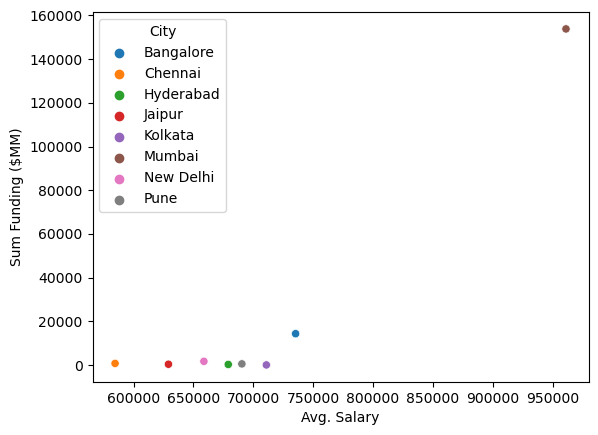

In [744]:
sns.scatterplot(x="Avg. Salary", y="Sum Funding ($MM)", hue="City", data=sps_fnd_loc)


we can see that Mumbaistands out in terms of total funding received by companies and salary paid to their employees

### 4. Web Scraping

Scraping [this census page](https://www.census2011.co.in/city.php) we can create a DataFrame called `cities` containing the first table from that page. 

In [745]:
#Request
url = "https://www.census2011.co.in/city.php"
page = requests.get(url)

#HTML Parsing
soup = BeautifulSoup(page.content, "html.parser")

#table extraction
table = soup.find("table")

#columns extraction
thead = []
for th in table.find_all('th'):
     thead_tmp = th.text.strip()
     thead.append(thead_tmp)

#data extraction
trows = []
for tr in table.find_all('tr'):
     trows.append([td.text.strip() for td in tr.find_all('td')])

#dataframe creation

cities = pd.DataFrame(trows, columns=thead)

In [746]:
#DF cleaning
del cities['#']
cities = cities.drop(cities.index[0])

In [747]:
cities.head()

,City,State,Population,Metropolitan,Sexratio,Literacy
1,Mumbai,Maharashtra,"12,442,373","18,414,288",853,89.73
2,Delhi,Delhi,"11,034,555","16,314,838",876,87.59
3,Bangalore,Karnataka,"8,443,675","8,499,399",923,88.71
4,Hyderabad,Andhra Pradesh,"6,731,790","7,749,334",955,83.26
5,Ahmedabad,Gujarat,"5,577,940","6,352,254",898,88.29


In [748]:
#Changing population and literacy to numeric
cities["Population"] = cities["Population"].str.replace(",","").astype("float")
cities['Literacy'] =cities['Literacy'].str.replace(",","").astype("float")
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 1 to 498
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          498 non-null    object 
 1   State         498 non-null    object 
 2   Population    498 non-null    float64
 3   Metropolitan  498 non-null    object 
 4   Sexratio      498 non-null    object 
 5   Literacy      498 non-null    float64
dtypes: float64(2), object(4)
memory usage: 23.5+ KB


In [749]:
#Let's check which City has the highest levels of `Literacy` in the country?

cities.sort_values("Literacy", ascending=False).head(1)



,City,State,Population,Metropolitan,Sexratio,Literacy
151,Aizawl,Mizoram,293416.0,"293,416",1025,98.36


In [750]:
# Now we merge the `cities` table with the `sps_fnd_loc` in a new DataFrame called `sps_fnd_loc_lit`.  
sps_fnd_loc_lit = sps_fnd_loc.merge(cities, on='City', how='inner')
sps_fnd_loc_lit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  7 non-null      object 
 1   Avg. Rating           7 non-null      float64
 2   Avg. Salary           7 non-null      float64
 3   Nr. Companies Funded  7 non-null      int64  
 4   Sum Funding ($MM)     7 non-null      float64
 5   State                 7 non-null      object 
 6   Population            7 non-null      float64
 7   Metropolitan          7 non-null      object 
 8   Sexratio              7 non-null      object 
 9   Literacy              7 non-null      float64
dtypes: float64(5), int64(1), object(4)
memory usage: 616.0+ bytes


In [751]:
#the resulting DataFrame is missing one row compared to the `sps_fnd_loc` dataset.
#We create two set with cities and "deduct" the first from the second so that we can identify the missing city
set1= set(sps_fnd_loc['City'])
set2 = set(cities['City'])

missing_city = set1 - set2
missing_city

{'New Delhi'}

In [752]:
#the missing city is New Delhi, now we have to check why

sps_fnd_loc["City"].unique()

array(['Bangalore', 'Chennai', 'Hyderabad', 'Jaipur', 'Kolkata', 'Mumbai',
       'New Delhi', 'Pune'], dtype=object)

In [753]:
cities["City"][cities["City"].str.contains('Delhi')].unique()


array(['Delhi', 'Delhi Cantonment'], dtype=object)

In [754]:
#In the dataset, new delhi is name just as Dehli, we edit the name in the df cities and merge again
cities.loc["Delhi", "City"] = "New Delhi"
sps_fnd_loc_lit = sps_fnd_loc.merge(cities, on='City', how='inner')
sps_fnd_loc_lit.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  8 non-null      object 
 1   Avg. Rating           8 non-null      float64
 2   Avg. Salary           8 non-null      float64
 3   Nr. Companies Funded  8 non-null      int64  
 4   Sum Funding ($MM)     8 non-null      float64
 5   State                 7 non-null      object 
 6   Population            7 non-null      float64
 7   Metropolitan          7 non-null      object 
 8   Sexratio              7 non-null      object 
 9   Literacy              7 non-null      float64
dtypes: float64(5), int64(1), object(4)
memory usage: 704.0+ bytes


<AxesSubplot: xlabel='Literacy', ylabel='Avg. Salary'>

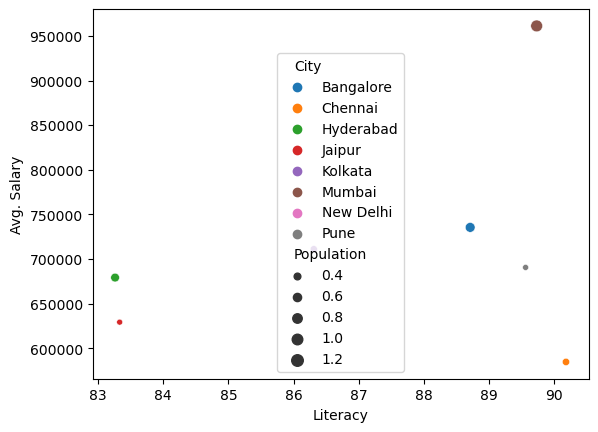

In [755]:
# Looking at the new `sps_fnd_loc_lit` DataFrame, now we can produce a scatterplot that shows `Literacy` on the x-axis, `Avg. Salary` on the y-axis and the `Population` as the size of the circles. 

sns.scatterplot(x="Literacy", y="Avg. Salary", size="Population", hue="City", data=sps_fnd_loc_lit)


As can be seen from the graphs, the city of Chennai despite the high level of Literacy has an avg. Lower salary than cities with lower Literacy level.
The difference with Mumbai stands out widely, which despite a slightly lower level of literacy has significantly higher average salaries
a possible explanation could come from the comparison with the amount of "financing" received, Mumbai would therefore represent a place where a lot is invested, consequently also increasing average salaries, which is different for Chennai where investments have been almost zero.